## Project Euler

https://projecteuler.net/about

### 1. Multiples of 3 and 5
If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.

In [20]:
(1 until 1000).filter(x => x % 3 == 0 || x % 5 == 0).sum

res19: Int = 233168

### 2. Even Fibonacci numbers
Each new term in the Fibonacci sequence is generated by adding the previous two terms. By starting with 1 and 2, the first 10 terms will be:

1, 2, 3, 5, 8, 13, 21, 34, 55, 89, ...

By considering the terms in the Fibonacci sequence whose values do not exceed four million, find the sum of the even-valued terms.

In [2]:
val fibs: Stream[BigInt] = BigInt(1) #:: BigInt(2) #:: fibs.zip(fibs.tail).map(n => n._1 + n._2)
fibs.takeWhile(_ <= 4000000).filter(_ % 2 == 0).sum

fibs: Stream[BigInt] = Stream(
  1,
  2,
  3,
  5,
  8,
  13,
  21,
  34,
  55,
  89,
  144,
  233,
  377,
  610,
  987,
  1597,
  2584,
  4181,
  6765,
  10946,
  17711,
  28657,
  46368,
  75025,
  121393,
  196418,
  317811,
  514229,
  832040,
  1346269,
  2178309,
  3524578,
  5702887,
  9227465,
  14930352,
  24157817,
  39088169,
  63245986,
...
res1_1: BigInt = 4613732

### 3. Largest prime factor
The prime factors of 13195 are 5, 7, 13 and 29.

What is the largest prime factor of the number 600851475143 ?

In [3]:
def isPrime(n: Long): Boolean = !(2 to math.sqrt(n).toInt).exists(n % _ == 0)
(2L to (math.sqrt(600851475143L).toInt + 1)).filter(600851475143L % _ == 0).filter(n => isPrime(n)).foreach(println)

71
839
1471
6857


defined function isPrime

### 4. Largest palindrome product
A palindromic number reads the same both ways. The largest palindrome made from the product of two 2-digit numbers is 9009 = 91 × 99.

Find the largest palindrome made from the product of two 3-digit numbers.


In [4]:
def palindrome(n: Int): Boolean = n.toString.reverse == n.toString
val prod = (for ( i <- 100 to 999; j <- 100 to 999) yield i * j).toSet.filter(palindrome(_)).max

defined function palindrome
prod: Int = 906609

### 5. Smallest multiple
2520 is the smallest number that can be divided by each of the numbers from 1 to 10 without any remainder.

What is the smallest positive number that is evenly divisible by all of the numbers from 1 to 20?

In [5]:
def gcd(a: Long, b: Long): Long = 
    if (b == 0) a
    else gcd(b, a % b)
//https://en.wikipedia.org/wiki/Least_common_multiple#Lattice-theoretic
// CAUTION: integer overflow! for the type parameters must be Long, NOT integer!
def lcm(a: Long, b: Long): Long = a * b / gcd(a, b)

(2L to 20L).foldLeft(1L)((x, e) => lcm(x, e))

defined function gcd
defined function lcm
res4_2: Long = 232792560L

In [6]:
val primes = Seq[Int](2,3,5,7,11,13,17,19)

def smallest_factor(n: Int):Int = {
    primes.find(n % _ == 0) match {
        case Some(v) => v
        case None => 1
    }
}
// based on the observation: 
// - from (2, n) the LCM is x
// - x cannot divide n + 1, and n + 1 = p1*p2*p3...pN, where pi are primes
// - then we choose the smalles prime factor of n + 1, i.e. p1, 
// - (n + 1)/p1 is in range 1 to n => x * p1 is the LCM of x and n + 1
(2 to 20).foldLeft(1)((x, e) => {
    if (x % e != 0) x * smallest_factor(e)
    else x
})

primes: Seq[Int] = List(2, 3, 5, 7, 11, 13, 17, 19)
defined function smallest_factor
res5_2: Int = 232792560

### 6. Sum square difference

The sum of the squares of the first ten natural numbers is,
$$1^2 + 2^2 + 3^2 + ... + 10^2 = 385 $$
The square of the sum of the first ten natural numbers is,
$$(1 + 2 + 3 + ... + 10)^2 = 3025$$
Hence the difference between the sum of the squares of the first ten natural numbers and the square of the sum is $3025 - 385 = 2640$.

Find the difference between the sum of the squares of the first one hundred natural numbers and the square of the sum.

In [7]:
(for (i <- 1 to 100; j <- i+1 to 100) yield 2 * i * j).sum

res6: Int = 25164150

In [8]:
(for (i <- 1 to 10; j <- i+1 to 10) yield 2 * i * j).sum

res7: Int = 2640

### 7. 10001st prime
By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13.

What is the 10 001st prime number?

https://en.wikipedia.org/wiki/Prime_number_theorem#Approximations_for_the_nth_prime_number

In [12]:
// WARNING: this could lead to stackoverflow exception
def sieve(stream: Stream[Int]): Stream[Int] = stream.head#::sieve(stream filter (_ % stream.head != 0))
def primes = sieve(Stream.from(2))
primes.drop(10000).take(1)

: 

### 8. Largest product in a series
The four adjacent digits in the 1000-digit number that have the greatest product are 9 × 9 × 8 × 9 = 5832.

73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450

Find the thirteen adjacent digits in the 1000-digit number that have the greatest product. What is the value of this product?

In [15]:
// be careful of integer overflow
val s = """73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450""".map(_ - '0').filter(n => n >=0 && n <= 9)
.sliding(13).map(vect => vect.foldRight(1L)(_ * _)).max

s: Long = 23514624000L

### 9. Special Pythagorean triplet
A Pythagorean triplet is a set of three natural numbers, a < b < c, for which,

$$a^2 + b^2 = c^2$$
For example, $3^2 + 4^2 = 9 + 16 = 25 = 5^2$.

There exists exactly one Pythagorean triplet for which a + b + c = 1000.
Find the product abc.

In [23]:
val op = (499 to 1 by -1).find(c => {
    (1 to c).find(a => (1000 - a - c) * (1000 - a - c) + a * a == c * c) match {
        case Some(x) => 
            print(x * c * (1000 - c - x))
            true
        case _ => false
    }
}) 


31875000

op: Option[Int] = Some(425)

### 10. Summation of primes
The sum of the primes below 10 is 2 + 3 + 5 + 7 = 17.

Find the sum of all the primes below two million.

In [29]:
// https://stackoverflow.com/a/14821313/2439891
val primes = 2L #:: sieve(3L)

def sieve(n: Long) : Stream[Long] =
      if (primes.takeWhile(p => p*p <= n).exists(n % _ == 0)) sieve(n + 2) // check if n is dividable by numbers in primes
      else n #:: sieve(n + 2)
primes.takeWhile(_ < 2000000L).sum

primes: Stream[Long] = Stream(
  2L,
  3L,
  5L,
  7L,
  11L,
  13L,
  17L,
  19L,
  23L,
  29L,
  31L,
  37L,
  41L,
  43L,
  47L,
  53L,
  59L,
  61L,
  67L,
  71L,
  73L,
  79L,
  83L,
  89L,
  97L,
  101L,
  103L,
  107L,
  109L,
  113L,
  127L,
  131L,
  137L,
  139L,
  149L,
  151L,
  157L,
  163L,
...
defined function sieve
res28_2: Long = 142913828922L

### 12. Highly divisible triangular number

The sequence of triangle numbers is generated by adding the natural numbers. So the 7th triangle number would be 1 + 2 + 3 + 4 + 5 + 6 + 7 = 28. The first ten terms would be:

1, 3, 6, 10, 15, 21, 28, 36, 45, 55, ...

Let us list the factors of the first seven triangle numbers:

 1: 1
 
 3: 1,3
 
 6: 1,2,3,6
 
10: 1,2,5,10

15: 1,3,5,15

21: 1,3,7,21

28: 1,2,4,7,14,28

We can see that 28 is the first triangle number to have over five divisors.

What is the value of the first triangle number to have over five hundred divisors?

In [5]:

def stream(n: Int):Stream[Int] = (n*(n + 1)/2) #:: stream(n + 1)
val s:Stream[Int] = stream(1)
// could be optimized
def num_divisors(n: Int): Int = (1 to math.sqrt(n).toInt).count(n % _ == 0) * 2

s.find(num_divisors(_) > 500)

defined function stream
s: Stream[Int] = Stream(
  1,
  3,
  6,
  10,
  15,
  21,
  28,
  36,
  45,
  55,
  66,
  78,
  91,
  105,
  120,
  136,
  153,
  171,
  190,
  210,
  231,
  253,
  276,
  300,
  325,
  351,
  378,
  406,
  435,
  465,
  496,
  528,
  561,
  595,
  630,
  666,
  703,
  741,
...
defined function num_divisors
res4_3: Option[Int] = Some(76576500)

### 13. Large sum
Work out the first ten digits of the sum of the following one-hundred 50-digit numbers.

```
37107287533902102798797998220837590246510135740250
46376937677490009712648124896970078050417018260538
74324986199524741059474233309513058123726617309629
91942213363574161572522430563301811072406154908250
23067588207539346171171980310421047513778063246676
89261670696623633820136378418383684178734361726757
28112879812849979408065481931592621691275889832738
44274228917432520321923589422876796487670272189318
47451445736001306439091167216856844588711603153276
70386486105843025439939619828917593665686757934951
62176457141856560629502157223196586755079324193331
64906352462741904929101432445813822663347944758178
92575867718337217661963751590579239728245598838407
58203565325359399008402633568948830189458628227828
80181199384826282014278194139940567587151170094390
35398664372827112653829987240784473053190104293586
86515506006295864861532075273371959191420517255829
71693888707715466499115593487603532921714970056938
54370070576826684624621495650076471787294438377604
53282654108756828443191190634694037855217779295145
36123272525000296071075082563815656710885258350721
45876576172410976447339110607218265236877223636045
17423706905851860660448207621209813287860733969412
81142660418086830619328460811191061556940512689692
51934325451728388641918047049293215058642563049483
62467221648435076201727918039944693004732956340691
15732444386908125794514089057706229429197107928209
55037687525678773091862540744969844508330393682126
18336384825330154686196124348767681297534375946515
80386287592878490201521685554828717201219257766954
78182833757993103614740356856449095527097864797581
16726320100436897842553539920931837441497806860984
48403098129077791799088218795327364475675590848030
87086987551392711854517078544161852424320693150332
59959406895756536782107074926966537676326235447210
69793950679652694742597709739166693763042633987085
41052684708299085211399427365734116182760315001271
65378607361501080857009149939512557028198746004375
35829035317434717326932123578154982629742552737307
94953759765105305946966067683156574377167401875275
88902802571733229619176668713819931811048770190271
25267680276078003013678680992525463401061632866526
36270218540497705585629946580636237993140746255962
24074486908231174977792365466257246923322810917141
91430288197103288597806669760892938638285025333403
34413065578016127815921815005561868836468420090470
23053081172816430487623791969842487255036638784583
11487696932154902810424020138335124462181441773470
63783299490636259666498587618221225225512486764533
67720186971698544312419572409913959008952310058822
95548255300263520781532296796249481641953868218774
76085327132285723110424803456124867697064507995236
37774242535411291684276865538926205024910326572967
23701913275725675285653248258265463092207058596522
29798860272258331913126375147341994889534765745501
18495701454879288984856827726077713721403798879715
38298203783031473527721580348144513491373226651381
34829543829199918180278916522431027392251122869539
40957953066405232632538044100059654939159879593635
29746152185502371307642255121183693803580388584903
41698116222072977186158236678424689157993532961922
62467957194401269043877107275048102390895523597457
23189706772547915061505504953922979530901129967519
86188088225875314529584099251203829009407770775672
11306739708304724483816533873502340845647058077308
82959174767140363198008187129011875491310547126581
97623331044818386269515456334926366572897563400500
42846280183517070527831839425882145521227251250327
55121603546981200581762165212827652751691296897789
32238195734329339946437501907836945765883352399886
75506164965184775180738168837861091527357929701337
62177842752192623401942399639168044983993173312731
32924185707147349566916674687634660915035914677504
99518671430235219628894890102423325116913619626622
73267460800591547471830798392868535206946944540724
76841822524674417161514036427982273348055556214818
97142617910342598647204516893989422179826088076852
87783646182799346313767754307809363333018982642090
10848802521674670883215120185883543223812876952786
71329612474782464538636993009049310363619763878039
62184073572399794223406235393808339651327408011116
66627891981488087797941876876144230030984490851411
60661826293682836764744779239180335110989069790714
85786944089552990653640447425576083659976645795096
66024396409905389607120198219976047599490197230297
64913982680032973156037120041377903785566085089252
16730939319872750275468906903707539413042652315011
94809377245048795150954100921645863754710598436791
78639167021187492431995700641917969777599028300699
15368713711936614952811305876380278410754449733078
40789923115535562561142322423255033685442488917353
44889911501440648020369068063960672322193204149535
41503128880339536053299340368006977710650566631954
81234880673210146739058568557934581403627822703280
82616570773948327592232845941706525094512325230608
22918802058777319719839450180888072429661980811197
77158542502016545090413245809786882778948721859617
72107838435069186155435662884062257473692284509516
20849603980134001723930671666823555245252804609722
53503534226472524250874054075591789781264330331690
```

In [6]:
"""37107287533902102798797998220837590246510135740250
46376937677490009712648124896970078050417018260538
74324986199524741059474233309513058123726617309629
91942213363574161572522430563301811072406154908250
23067588207539346171171980310421047513778063246676
89261670696623633820136378418383684178734361726757
28112879812849979408065481931592621691275889832738
44274228917432520321923589422876796487670272189318
47451445736001306439091167216856844588711603153276
70386486105843025439939619828917593665686757934951
62176457141856560629502157223196586755079324193331
64906352462741904929101432445813822663347944758178
92575867718337217661963751590579239728245598838407
58203565325359399008402633568948830189458628227828
80181199384826282014278194139940567587151170094390
35398664372827112653829987240784473053190104293586
86515506006295864861532075273371959191420517255829
71693888707715466499115593487603532921714970056938
54370070576826684624621495650076471787294438377604
53282654108756828443191190634694037855217779295145
36123272525000296071075082563815656710885258350721
45876576172410976447339110607218265236877223636045
17423706905851860660448207621209813287860733969412
81142660418086830619328460811191061556940512689692
51934325451728388641918047049293215058642563049483
62467221648435076201727918039944693004732956340691
15732444386908125794514089057706229429197107928209
55037687525678773091862540744969844508330393682126
18336384825330154686196124348767681297534375946515
80386287592878490201521685554828717201219257766954
78182833757993103614740356856449095527097864797581
16726320100436897842553539920931837441497806860984
48403098129077791799088218795327364475675590848030
87086987551392711854517078544161852424320693150332
59959406895756536782107074926966537676326235447210
69793950679652694742597709739166693763042633987085
41052684708299085211399427365734116182760315001271
65378607361501080857009149939512557028198746004375
35829035317434717326932123578154982629742552737307
94953759765105305946966067683156574377167401875275
88902802571733229619176668713819931811048770190271
25267680276078003013678680992525463401061632866526
36270218540497705585629946580636237993140746255962
24074486908231174977792365466257246923322810917141
91430288197103288597806669760892938638285025333403
34413065578016127815921815005561868836468420090470
23053081172816430487623791969842487255036638784583
11487696932154902810424020138335124462181441773470
63783299490636259666498587618221225225512486764533
67720186971698544312419572409913959008952310058822
95548255300263520781532296796249481641953868218774
76085327132285723110424803456124867697064507995236
37774242535411291684276865538926205024910326572967
23701913275725675285653248258265463092207058596522
29798860272258331913126375147341994889534765745501
18495701454879288984856827726077713721403798879715
38298203783031473527721580348144513491373226651381
34829543829199918180278916522431027392251122869539
40957953066405232632538044100059654939159879593635
29746152185502371307642255121183693803580388584903
41698116222072977186158236678424689157993532961922
62467957194401269043877107275048102390895523597457
23189706772547915061505504953922979530901129967519
86188088225875314529584099251203829009407770775672
11306739708304724483816533873502340845647058077308
82959174767140363198008187129011875491310547126581
97623331044818386269515456334926366572897563400500
42846280183517070527831839425882145521227251250327
55121603546981200581762165212827652751691296897789
32238195734329339946437501907836945765883352399886
75506164965184775180738168837861091527357929701337
62177842752192623401942399639168044983993173312731
32924185707147349566916674687634660915035914677504
99518671430235219628894890102423325116913619626622
73267460800591547471830798392868535206946944540724
76841822524674417161514036427982273348055556214818
97142617910342598647204516893989422179826088076852
87783646182799346313767754307809363333018982642090
10848802521674670883215120185883543223812876952786
71329612474782464538636993009049310363619763878039
62184073572399794223406235393808339651327408011116
66627891981488087797941876876144230030984490851411
60661826293682836764744779239180335110989069790714
85786944089552990653640447425576083659976645795096
66024396409905389607120198219976047599490197230297
64913982680032973156037120041377903785566085089252
16730939319872750275468906903707539413042652315011
94809377245048795150954100921645863754710598436791
78639167021187492431995700641917969777599028300699
15368713711936614952811305876380278410754449733078
40789923115535562561142322423255033685442488917353
44889911501440648020369068063960672322193204149535
41503128880339536053299340368006977710650566631954
81234880673210146739058568557934581403627822703280
82616570773948327592232845941706525094512325230608
22918802058777319719839450180888072429661980811197
77158542502016545090413245809786882778948721859617
72107838435069186155435662884062257473692284509516
20849603980134001723930671666823555245252804609722
53503534226472524250874054075591789781264330331690""".split("\\n")
.map(BigInt(_)).sum.toString.take(10)

res5: String = "5537376230"

### 14. Longest Collatz sequence
The following iterative sequence is defined for the set of positive integers:

n → n/2 (n is even)
n → 3n + 1 (n is odd)

Using the rule above and starting with 13, we generate the following sequence:

13 → 40 → 20 → 10 → 5 → 16 → 8 → 4 → 2 → 1
It can be seen that this sequence (starting at 13 and finishing at 1) contains 10 terms. Although it has not been proved yet (Collatz Problem), it is thought that all starting numbers finish at 1.

Which starting number, under one million, produces the longest chain?

NOTE: Once the chain starts the terms are allowed to go above one million.

In [5]:
import scala.collection.mutable.Map
// stackoverflow
def collatz(n: Int): Seq[Int] = 
    if (n == 1) Seq(1)
    else if (n % 2 == 0) n +: collatz(n/2)
    else n +: collatz(3 * n + 1)

val map = Map[Int, Int]()
map += 1 -> 0
def steps(n: Int): Int = {
    if (map.contains(n)) map(n)
    else {
        if (n % 2 == 0) {
            val s = 1 + steps(n / 2)
            map += n -> s
            s
        } else {
            val s = 1 + steps(3 * n + 1)
            map += n -> s
            s
        }
    }
}

var max = (0,0)
for (i <- 1 to 100000) { // OK to 100,000, overflows at 1,000,000, TODO
    val s = steps(i)
    if (s > max._2) max = (i, s)
}

print(max)

(77031,350)

import scala.collection.mutable.Map
// stackoverflow

defined function collatz
map: Map[Int, Int] = Map(
  41623 -> 150,
  67471 -> 60,
  12572 -> 107,
  38420 -> 168,
  270898 -> 62,
  245050 -> 181,
  137218 -> 175,
  108167 -> 79,
  66816 -> 37,
  1256795 -> 204,
  252371 -> 150,
  112222 -> 110,
  373814 -> 86,
  3611830 -> 89,
  45023 -> 163,
  70871 -> 81,
  277564 -> 145,
  140618 -> 250,
  29520 -> 41,
  3672 -> 131,
  114770 -> 105,
  6938 -> 31,
  239416 -> 212,
  265264 -> 119,
  379628 -> 78,
  99267 -> 115,
  210365 -> 67,
  184517 -> 59,
  47571 -> 220,
  637954 -> 79,
  73419 -> 68,
  44368 -> 39,
  76685 -> 125,
  417058 -> 161,
  32068 -> 147,
  6220 -> 36,
  72764 -> 143,
  197410 -> 41,
...
res4_3: Map[Int, Int] = Map(
  41623 -> 150,
  67471 -> 60,
  12572 -> 107,
  38420 -> 168,
  270898 -> 62,
  245050 -> 181,
  137218 -> 175,
  108167 -> 79,
  66816 -> 37,
  1256795 -> 204,
  252371 -> 150,
  112222 -> 110,
  373814 -> 86,
  3611830 -> 89,
  45023 -> 163,
  70871 -> 81,
  277564 -> 145,
  140618 -> 250,
  29520 -> 41,
  3672 -> 131,
  114770 -> 105,
  6938 -> 31,
  239416 -> 212,
  265264 -> 119,
  379628 -> 78,
  99267 -> 115,
  210365 -> 67,
  184517 -> 59,
  47571 -> 220,
  637954 -> 79,
  73419 -> 68,
  44368 -> 39,
  76685 -> 125,
  417058 -> 161,
  32068 -> 147,
  6220 -> 36,
  72764 -> 143,
  197410 -> 41,
...
defined function steps
max: (Int, Int) = (77031, 350)

### 15. Lattice paths
Starting in the top left corner of a 2×2 grid, and only being able to move to the right and down, there are exactly 6 routes to the bottom right corner.

How many such routes are there through a 20×20 grid?

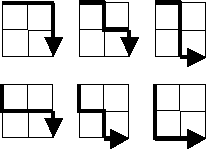

In [17]:
def routes(n: Int): Long = {
    val mat = Array.ofDim[Long](n + 1, n + 1)
    
    for (i <- 0 to n) {
        mat(i)(n) = 1L
        mat(n)(i) = 1L
    }
    for (i <- n - 1 to 0 by -1;j <- n - 1 to 0 by -1) {
        mat(i)(j) = mat(i)(j+1) + mat(i+1)(j)
    }
    mat(0)(0)
}

routes(20)

defined function routes
res16_1: Long = 137846528820L

### 16. Power digit sum
2<sup>15</sup>  = 32768 and the sum of its digits is 3 + 2 + 7 + 6 + 8 = 26.

What is the sum of the digits of the number 2<sup>1000</sup>?

In [19]:
// what if we do not use BigInt?
BigInt(2).pow(1000).toString.map(_.asDigit).sum

res18: Int = 1366

### 17. Number letter counts
If the numbers 1 to 5 are written out in words: one, two, three, four, five, then there are 3 + 3 + 5 + 4 + 4 = 19 letters used in total.

If all the numbers from 1 to 1000 (one thousand) inclusive were written out in words, how many letters would be used?


NOTE: Do not count spaces or hyphens. For example, 342 (three hundred and forty-two) contains 23 letters and 115 (one hundred and fifteen) contains 20 letters. The use of "and" when writing out numbers is in compliance with British usage.


### 18. Maximum path sum I

By starting at the top of the triangle below and moving to adjacent numbers on the row below, the maximum total from top to bottom is 23.

**3**  
**7** 4  
2 **4** 6  
8 5 **9** 3

That is, 3 + 7 + 4 + 9 = 23.

Find the maximum total from top to bottom of the triangle below:

75  
95 64  
17 47 82  
18 35 87 10  
20 04 82 47 65  
19 01 23 75 03 34  
88 02 77 73 07 63 67  
99 65 04 28 06 16 70 92  
41 41 26 56 83 40 80 70 33  
41 48 72 33 47 32 37 16 94 29  
53 71 44 65 25 43 91 52 97 51 14  
70 11 33 28 77 73 17 78 39 68 17 57  
91 71 52 38 17 14 91 43 58 50 27 29 48  
63 66 04 68 89 53 67 30 73 16 69 87 40 31  
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23

**NOTE:** As there are only 16384 routes, it is possible to solve this problem by trying every route. However, [Problem 67](problem=67), is the same challenge with a triangle containing one-hundred rows; it cannot be solved by brute force, and requires a clever method! ;o)

In [44]:
val nums = """75  
95 64  
17 47 82  
18 35 87 10  
20 04 82 47 65  
19 01 23 75 03 34  
88 02 77 73 07 63 67  
99 65 04 28 06 16 70 92  
41 41 26 56 83 40 80 70 33  
41 48 72 33 47 32 37 16 94 29  
53 71 44 65 25 43 91 52 97 51 14  
70 11 33 28 77 73 17 78 39 68 17 57  
91 71 52 38 17 14 91 43 58 50 27 29 48  
63 66 04 68 89 53 67 30 73 16 69 87 40 31  
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23""".split("\n").map(_.split("\\s").map(_.toInt))

val rows = nums.length

for (i <- rows - 2 to 0 by -1; j <- 0 to i) 
    nums(i)(j) = nums(i)(j) + math.max(nums(i+1)(j), nums(i+1)(j+1))
nums(0)(0)


nums: Array[Array[Int]] = Array(
  Array(1074),
  Array(995, 999),
  Array(818, 900, 935),
  Array(704, 801, 853, 792),
  Array(686, 640, 766, 731, 782),
  Array(666, 614, 636, 684, 660, 717),
  Array(647, 501, 613, 609, 533, 657, 683),
  Array(559, 499, 479, 536, 514, 526, 594, 616),
  Array(460, 434, 419, 475, 508, 470, 510, 524, 487),
  Array(419, 365, 393, 387, 419, 425, 430, 376, 454, 322),
  Array(378, 317, 231, 321, 354, 372, 393, 354, 360, 293, 247),
  Array(325, 246, 187, 178, 256, 329, 273, 302, 263, 242, 193, 233),
  Array(255, 235, 154, 150, 140, 179, 256, 209, 224, 172, 174, 176, 148),
  Array(125, 164, 102, 95, 112, 123, 165, 128, 166, 109, 122, 147, 100, 54),
  Array(4, 62, 98, 27, 23, 9, 70, 98, 73, 93, 38, 53, 60, 4, 23)
)
rows: Int = 15
res43_3: Int = 1074

### 20. Factorial digit sum

n! means n × (n − 1) × ... × 3 × 2 × 1

For example, 10! = 10 × 9 × ... × 3 × 2 × 1 = 3628800,
and the sum of the digits in the number 10! is 3 + 6 + 2 + 8 + 8 + 0 + 0 = 27.

Find the sum of the digits in the number 100!

In [32]:
def factorial(n: Int): BigInt = if (n == 1) BigInt(1) else n * factorial(n - 1)
factorial(100).toString.map(_.asDigit).sum

defined function factorial
res31_1: Int = 648

### 21. Amicable numbers
Let d(n) be defined as the sum of proper divisors of n (numbers less than n which divide evenly into n).
If d(a) = b and d(b) = a, where a ≠ b, then a and b are an amicable pair and each of a and b are called amicable numbers.

For example, the proper divisors of 220 are 1, 2, 4, 5, 10, 11, 20, 22, 44, 55 and 110; therefore d(220) = 284. The proper divisors of 284 are 1, 2, 4, 71 and 142; so d(284) = 220.

Evaluate the sum of all the amicable numbers under 10000.



In [21]:

def properDivSum(n: Int) = (1 to n / 2).filter(d => n % d == 0 && (d % 2 == 0 || n/d % 2 == 0)).sum
val seq = (2 to 10000 by 2).map(n => (n,properDivSum(n))).toMap
val sum = seq.filter(p => (p._1 != p._2) && (seq contains p._2) && seq(p._2) == p._1).map(_._1).sum

defined function properDivSum
seq: collection.immutable.Map[Int, Int] = Map(
  892 -> 676,
  5810 -> 6286,
  8062 -> 4538,
  8536 -> 9104,
  1322 -> 664,
  5686 -> 2846,
  1036 -> 1092,
  9982 -> 8450,
  2822 -> 1714,
  7304 -> 7816,
  2630 -> 2122,
  4188 -> 5612,
  1586 -> 1018,
  8618 -> 4822,
  2452 -> 1846,
  8960 -> 15568,
  8930 -> 8350,
  4560 -> 10320,
  7766 -> 4978,
  3962 -> 2854,
  5422 -> 2714,
  1718 -> 862,
  2094 -> 2106,
  6836 -> 5134,
  9208 -> 8072,
  3944 -> 4156,
  8186 -> 4096,
  5116 -> 3844,
  9458 -> 4732,
  2612 -> 1966,
  4094 -> 2386,
  1024 -> 1023,
  5918 -> 3802,
  7272 -> 12618,
  8398 -> 6722,
  5088 -> 8520,
  2744 -> 3256,
  138 -> 150,
...
sum: Int = 31626

### 22. Names scores

Using names.txt (right click and 'Save Link/Target As...'), a 46K text file containing over five-thousand first names, begin by sorting it into alphabetical order. Then working out the alphabetical value for each name, multiply this value by its alphabetical position in the list to obtain a name score.

For example, when the list is sorted into alphabetical order, COLIN, which is worth 3 + 15 + 12 + 9 + 14 = 53, is the 938th name in the list. So, COLIN would obtain a score of 938 × 53 = 49714.

What is the total of all the name scores in the file?

In [37]:
def stringVal(s: String):Int = s.map(c => c - 'A' + 1).sum

import scala.io.Source
val filename = "/Users/zhaoshilong/jupyter/project_euler/p022_names.txt"
val sortedSeq = Source.fromFile(filename).getLines.map(_.replaceAll("\"", ""))
    .flatMap(_.split(",")).toSeq.sorted(Ordering.String)
(for (i <- 1 to sortedSeq.length) yield BigInt(i * stringVal(sortedSeq(i - 1)))).sum

defined function stringVal
import scala.io.Source

filename: String = "/Users/zhaoshilong/jupyter/project_euler/p022_names.txt"
sortedSeq: Seq[String] = Stream(
  "AARON",
  "ABBEY",
  "ABBIE",
  "ABBY",
  "ABDUL",
  "ABE",
  "ABEL",
  "ABIGAIL",
  "ABRAHAM",
  "ABRAM",
  "ADA",
  "ADAH",
  "ADALBERTO",
  "ADALINE",
  "ADAM",
  "ADAN",
  "ADDIE",
  "ADELA",
  "ADELAIDA",
  "ADELAIDE",
  "ADELE",
  "ADELIA",
  "ADELINA",
  "ADELINE",
  "ADELL",
  "ADELLA",
  "ADELLE",
  "ADENA",
  "ADINA",
  "ADOLFO",
  "ADOLPH",
  "ADRIA",
  "ADRIAN",
  "ADRIANA",
  "ADRIANE",
  "ADRIANNA",
  "ADRIANNE",
  "ADRIEN",
...
res36_4: BigInt = 871198282

### 23. Non-abundant sums

A perfect number is a number for which the sum of its proper divisors is exactly equal to the number. For example, the sum of the proper divisors of 28 would be 1 + 2 + 4 + 7 + 14 = 28, which means that 28 is a perfect number.

A number n is called deficient if the sum of its proper divisors is less than n and it is called abundant if this sum exceeds n.

As 12 is the smallest abundant number, 1 + 2 + 3 + 4 + 6 = 16, the smallest number that can be written as the sum of two abundant numbers is 24. By mathematical analysis, it can be shown that all integers greater than 28123 can be written as the sum of two abundant numbers. However, this upper limit cannot be reduced any further by analysis even though it is known that the greatest number that cannot be expressed as the sum of two abundant numbers is less than this limit.

Find the sum of all the positive integers which cannot be written as the sum of two abundant numbers.

In [1]:
// See problem 21
def properDivSum(n: Int) = (1 to n / 2).filter(d => n % d == 0 && (d % 2 == 0 || n/d % 2 == 0)).sum
val nums = (2 to 28123 by 2).filter(n => n < properDivSum(n)).toSet

(1 to 28123).filter(x => x %2 == 1 || ).sum

defined function properDivSum
ab: collection.immutable.IndexedSeq[Int] = Vector(
  12,
  18,
  20,
  24,
  30,
  36,
  40,
  42,
  48,
  54,
  56,
  60,
  66,
  70,
  72,
  78,
  80,
  84,
  88,
  90,
  96,
  100,
  102,
  104,
  108,
  112,
  114,
  120,
  126,
  132,
  138,
  140,
  144,
  150,
  156,
  160,
  162,
  168,
...
res0_2: Int = 197739844